In [2]:
import pandas as pd

🔹 Variables del dataset:

Channel: Tipo de canal de cliente (Horeca vs Retail).

Region: Ubicación del cliente.

Fresh: Gasto en productos frescos.

Milk: Gasto en productos lácteos.

Grocery: Gasto en comestibles.

Frozen: Gasto en productos congelados.

Detergents_Paper: Gasto en detergentes y papel.

Delicassen: Gasto en productos delicatessen.

In [3]:
df = pd.read_csv(r"C:\Users\patri\REPO_PRUEBA\ONLINE_DS_THEBRIDGE_Patricia_Diez\ML\Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


array([[<Axes: title={'center': 'Channel'}>,
        <Axes: title={'center': 'Region'}>,
        <Axes: title={'center': 'Fresh'}>],
       [<Axes: title={'center': 'Milk'}>,
        <Axes: title={'center': 'Grocery'}>,
        <Axes: title={'center': 'Frozen'}>],
       [<Axes: title={'center': 'Detergents_Paper'}>,
        <Axes: title={'center': 'Delicassen'}>, <Axes: >]], dtype=object)

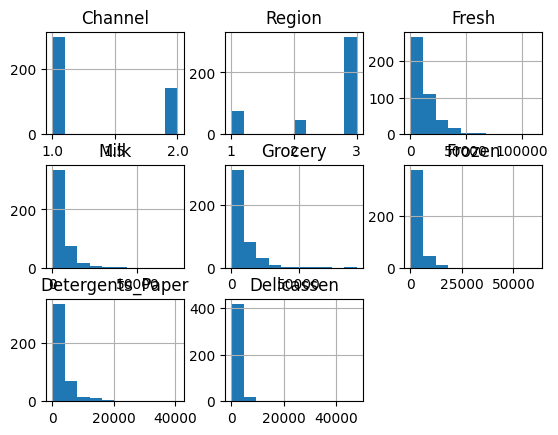

In [4]:
df.hist()

In [5]:
from sklearn.preprocessing import MinMaxScaler

features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
df_selected = df[features]

# Aplicar Min-Max Scaling
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_selected)

# Convertir de nuevo a DataFrame con nombres originales
df_scaled = pd.DataFrame(df_scaled, columns=features)

# Mostrar los datos escalados
print(df_scaled.head())


      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0  0.112940  0.130727  0.081464  0.003106          0.065427    0.027847
1  0.062899  0.132824  0.103097  0.028548          0.080590    0.036984
2  0.056622  0.119181  0.082790  0.039116          0.086052    0.163559
3  0.118254  0.015536  0.045464  0.104842          0.012346    0.037234
4  0.201626  0.072914  0.077552  0.063934          0.043455    0.108093


array([[<Axes: title={'center': 'Fresh'}>,
        <Axes: title={'center': 'Milk'}>],
       [<Axes: title={'center': 'Grocery'}>,
        <Axes: title={'center': 'Frozen'}>],
       [<Axes: title={'center': 'Detergents_Paper'}>,
        <Axes: title={'center': 'Delicassen'}>]], dtype=object)

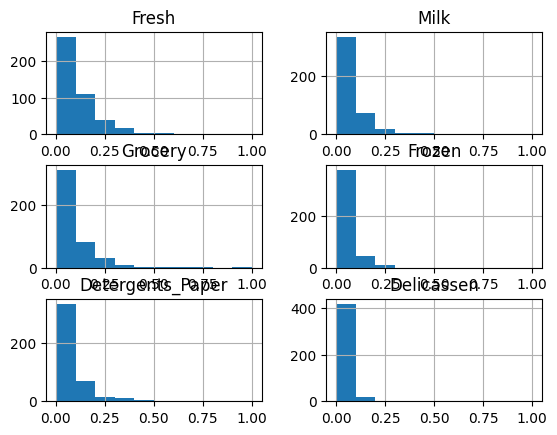

In [6]:
df_scaled.hist()

In [7]:
print(df[features].describe())


               Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper    Delicassen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000  


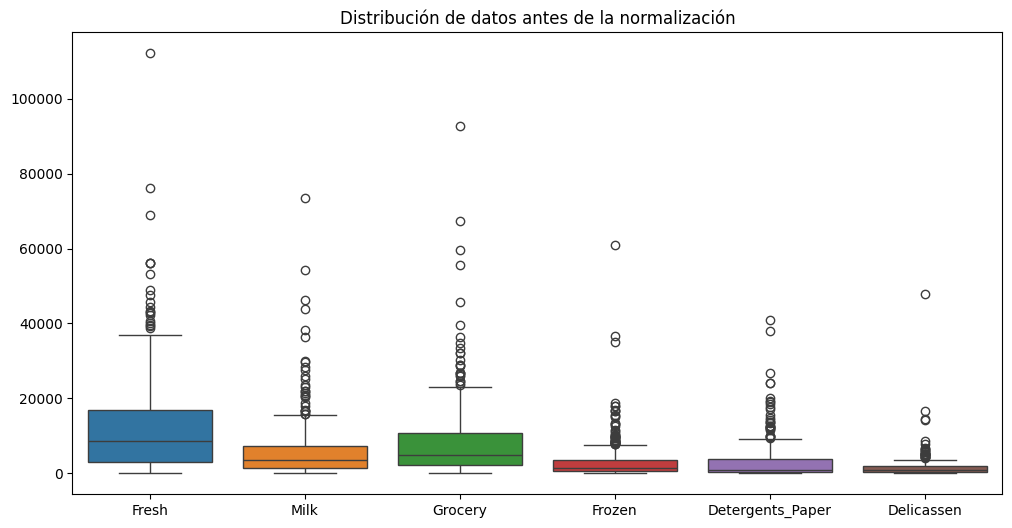

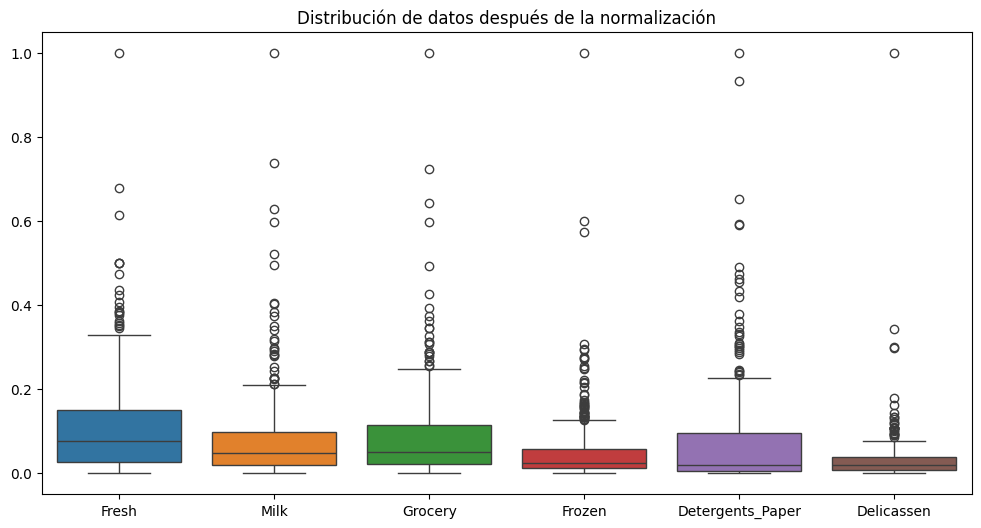

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots antes de normalizar
plt.figure(figsize=(12,6))
sns.boxplot(data=df[features])
plt.title("Distribución de datos antes de la normalización")
plt.show()

# Boxplots después de normalizar
plt.figure(figsize=(12,6))
sns.boxplot(data=df_scaled)
plt.title("Distribución de datos después de la normalización")
plt.show()


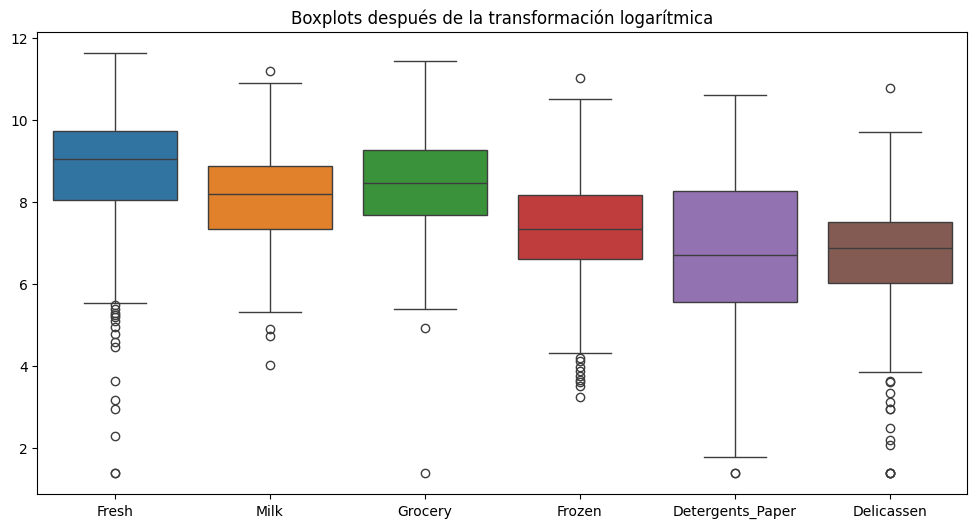

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Aplicar logaritmo + 1 para evitar problemas con ceros
df_log = np.log1p(df[["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]])

# Visualizar nuevos boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=df_log)
plt.title("Boxplots después de la transformación logarítmica")
plt.show()

In [10]:
df_log.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.732813,8.121615,8.442205,7.303128,6.791781,6.671094
std,1.470618,1.080635,1.111523,1.281888,1.709519,1.293960
min,1.386294,4.025352,1.386294,3.258097,1.386294,1.386294
25%,8.048378,7.335633,7.675081,6.611024,5.551989,6.014321
50%,9.048404,8.196435,8.467267,7.331043,6.706242,6.873680
75%,9.737123,8.880619,9.273948,8.176177,8.274596,7.507278
max,11.627610,11.205027,11.437997,11.016496,10.617123,10.777789


In [11]:
from sklearn.preprocessing import StandardScaler

# Aplicar normalización estándar
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_log)

# Convertir a DataFrame
import pandas as pd
df_scaled = pd.DataFrame(df_scaled, columns=df_log.columns)

# Revisar los estadísticos después de normalizar
print(df_scaled.describe())


              Fresh          Milk       Grocery        Frozen  \
count  4.400000e+02  4.400000e+02  4.400000e+02  4.400000e+02   
mean   3.229740e-17 -7.105427e-16 -1.081963e-15  2.987509e-16   
std    1.001138e+00  1.001138e+00  1.001138e+00  1.001138e+00   
min   -5.001217e+00 -3.794924e+00 -6.355190e+00 -3.159118e+00   
25%   -4.659360e-01 -7.281616e-01 -6.909415e-01 -5.405240e-01   
50%    2.148413e-01  6.931547e-02  2.257341e-02  2.180154e-02   
75%    6.836939e-01  7.031679e-01  7.491423e-01  6.818408e-01   
max    1.970662e+00  2.856582e+00  2.698281e+00  2.900093e+00   

       Detergents_Paper    Delicassen  
count      4.400000e+02  4.400000e+02  
mean      -6.297992e-16 -2.220446e-17  
std        1.001138e+00  1.001138e+00  
min       -3.165591e+00 -4.088856e+00  
25%       -7.260542e-01 -5.081462e-01  
50%       -5.009412e-02  1.567407e-01  
75%        8.683740e-01  6.469559e-01  
max        2.240218e+00  3.177354e+00  


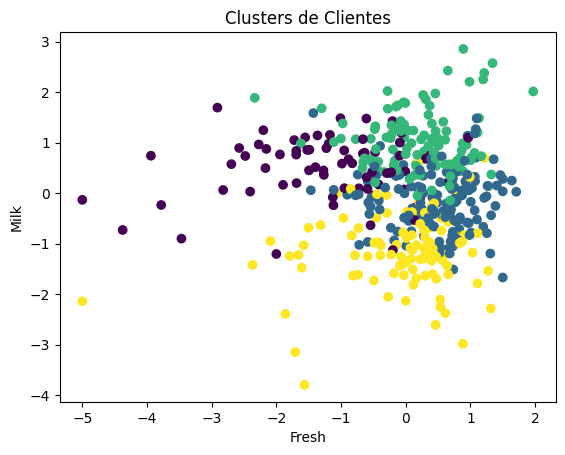

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Aplicar K-Means con un número de clusters determinado (ej. 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Visualizar los clusters (si quieres, usa un gráfico 2D de las primeras dos componentes principales)
plt.scatter(df_scaled['Fresh'], df_scaled['Milk'], c=df_scaled['Cluster'], cmap='viridis')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('Clusters de Clientes')
plt.show()


In [13]:
# Añadir el número de cluster al DataFrame original
df['Cluster'] = df_scaled['Cluster']

# Ver las estadísticas descriptivas por cluster
print(df.groupby('Cluster').mean())


          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.585714  2.585714   2893.528571   6809.671429  11777.414286   
1        1.055172  2.496552  17531.896552   3493.413793   3851.951724   
2        1.808696  2.573913  12703.000000  12307.756522  16522.939130   
3        1.000000  2.545455   9769.218182   1379.481818   1958.836364   

              Frozen  Detergents_Paper   Delicassen  
Cluster                                              
0         597.214286       4995.828571   660.728571  
1        5027.965517        650.903448  1569.124138  
2        2942.904348       6844.913043  2957.026087  
3        2203.236364        332.754545   519.190909  
